In [1]:
%load_ext autoreload
%autoreload 1

%aimport basics
%aimport nn_config
%aimport enc_dec

from basics import *
from nn_config import *
from enc_dec import *
%matplotlib inline

  0%|          | 0/3977 [00:00<?, ?it/s]

translating es to en
callhome es-en configuration
--------------------------------------------------
loading info_dict from=./mfcc_out/info.dict
--------------------------------------------------
creating buckets for: fisher_dev
creating buckets for key: sp


 29%|██▊       | 39598/138708 [00:00<00:00, 395975.66it/s]

creating buckets for: fisher_dev2
creating buckets for key: sp
creating buckets for: fisher_test
creating buckets for key: sp
creating buckets for: fisher_train
creating buckets for key: sp


100%|██████████| 138708/138708 [00:00<00:00, 431637.54it/s]


--------------------------------------------------
saving info dict in: ./mfcc_out/buckets_sp.dict
all done ...
--------------------------------------------------
showing buckets for category: fisher_dev
number of buckets=20, width of each bucket=64
index | width | num   
    0 |     0 |     75
    1 |    64 |    733
    2 |   128 |    598
    3 |   192 |    398
    4 |   256 |    346
    5 |   320 |    281
    6 |   384 |    220
    7 |   448 |    200
    8 |   512 |    150
    9 |   576 |    148
   10 |   640 |    145
   11 |   704 |    116
   12 |   768 |     97
   13 |   832 |    103
   14 |   896 |     91
   15 |   960 |     57
   16 |  1024 |     52
   17 |  1088 |     55
   18 |  1152 |     34
   19 |  1216 |     78
--------------------------------------------------
showing buckets for category: fisher_dev2
number of buckets=20, width of each bucket=64
index | width | num   
    0 |     0 |     54
    1 |    64 |    591
    2 |   128 |    548
    3 |   192 |    463
    4 |   256

In [2]:
from nmt_run import *

cnn_out_dim = rnn_in_units =  60


/afs/inf.ed.ac.uk/group/project/lowres/work/anaconda3/envs/chainer2/lib/python3.6/site-packages/chainer/utils/experimental.py:104: FutureWarning: chainer.links.normalization.layer_normalization.py is experimental. The interface can change in the future.
  FutureWarning)


using ADAM optimizer


In [3]:
last_epoch = check_model()

--------------------------------------------------------------------------------
model not found


In [4]:
t = L.Linear(5,5, nobias=True)

In [5]:
# a dimensions: batch_size, sequence length, hidden units
a = Variable(np.random.randn(9,7,5).astype(np.float32))
b = Variable(np.random.randn(1,5).astype(np.float32))
a.shape, b.shape

((9, 7, 5), (1, 5))

In [6]:
x = t(b)
# F.matmul(a,x, transb=True)

In [7]:
# F.softmax(F.matmul(a,t(b),transb=True),axis=0)

In [8]:
F.rollaxis(a,2).shape

(5, 9, 7)

### Get batch of data

In [9]:
key = 'fisher_train'

In [10]:
b_dict=bucket_dict[key]
m_dict = map_dict[key]
vocab_dict=vocab_dict
batch_size=16
x_key=enc_key
y_key=dec_key
train=True
cat_speech_path=os.path.join(out_path, key)

b = num_b-1
# b = 9
bucket = b_dict['buckets'][b]
b_len = len(bucket)

In [11]:
num_b, b_len

(20, 4312)

In [12]:
utt_list = bucket[:batch_size]

In [13]:
batch_data = get_batch(m_dict, x_key, y_key, utt_list, vocab_dict, ((b+1) * width_b), num_b*b_len, 
                           cat_speech_path=cat_speech_path)
batch_data['X'].shape, batch_data['y'].shape

((16, 1280, 39), (16, 150))

In [14]:
en_chars = [w.decode() for w in m_dict[utt_list[0]][y_key]]
en_ids = [str(vocab_dict[y_key]['w2i'].get(w, UNK_ID)) for w in m_dict[utt_list[0]][y_key]]

In [15]:
print("".join(en_chars))
print(en_ids)

well yes no who knows the the i mean in the past marriage were like fixed you had to marry a guy with money or with the
['8', '5', '6', '6', '11', '20', '5', '14', '11', '17', '7', '11', '8', '4', '7', '11', '16', '17', '7', '8', '14', '11', '10', '4', '5', '11', '10', '4', '5', '11', '9', '11', '12', '5', '13', '17', '11', '9', '17', '11', '10', '4', '5', '11', '15', '13', '14', '10', '11', '12', '13', '22', '22', '9', '13', '18', '5', '11', '8', '5', '22', '5', '11', '6', '9', '16', '5', '11', '25', '9', '33', '5', '24', '11', '20', '7', '21', '11', '4', '13', '24', '11', '10', '7', '11', '12', '13', '22', '22', '20', '11', '13', '11', '18', '21', '20', '11', '8', '9', '10', '4', '11', '12', '7', '17', '5', '20', '11', '7', '22', '11', '8', '9', '10', '4', '11', '10', '4', '5']


In [16]:
print("bucket size={0:d}".format(b_len))

for i in range(0,b_len, batch_size):
    utt_list = bucket[i:i+batch_size]
    batch_data = get_batch(m_dict, x_key, y_key, utt_list, vocab_dict, ((b+1) * width_b), (80), 
                           cat_speech_path=cat_speech_path)
    
    print(i, batch_data['X'].shape, batch_data['y'].shape)
    
    p, loss = model.forward(batch_data['X'], batch_data['y'])
    print(loss)
    break

bucket size=4312
0 (16, 1280, 39) (16, 150)
variable(783.9828491210938)


In [17]:
model.cleargrads()

In [18]:
loss.backward()

In [19]:
if lstm1_or_gru0:
    print(model.L1_dec.lateral.W.grad)
else:
    print(model.L1_dec.W.W.grad)

[[-33.64988708   8.08380508   8.95779419 ..., -43.45877075  11.64368057
   73.16069031]
 [ -9.46859169  -4.87609577   5.85267115 ..., -10.41169262  10.37285709
   15.60807133]
 [ -5.38474846  -1.98847294  17.86258698 ...,   7.65962029   9.79898643
   39.59176636]
 ..., 
 [  9.83864212  12.80037785  31.68913651 ...,  16.46880341 -15.07423687
    1.43122721]
 [-18.81478119  -6.87462234   9.6472559  ..., -27.51366425   3.9531436
   15.21145821]
 [  0.64102012 -11.10811234  20.15991783 ..., -24.90569115   0.57724261
   25.74953842]]


In [20]:
model.attn_Wa.W.grad

array([[ -147.7593689 ,    -2.36455679,   -27.53168488, ...,
          -19.35217667,   -84.54588318,  -280.55969238],
       [  120.15211487,    72.27873993,   160.7159729 , ...,
           88.99469757,  -251.2326355 ,  -366.57797241],
       [ -365.5730896 ,    -4.9597311 ,  -145.09417725, ...,
          -79.32572937,   147.92979431,   149.55645752],
       ..., 
       [   23.18840027,   224.00543213,   686.19219971, ...,
          119.38734436,  -449.52478027, -1286.08410645],
       [   22.97613525,   -27.30207253,    39.02653122, ...,
          -56.02933502,    74.60786438,   144.35256958],
       [   30.57595444,    38.58723068,   -12.92539024, ...,
          100.50601196,   -72.22195435,  -184.11869812]], dtype=float32)

In [21]:
model.out.W.grad

array([[ 0.05852682, -0.22259027, -0.02887226, ...,  0.06145174,
         0.04910734,  0.06386186],
       [ 0.0618061 , -0.3025319 , -0.02406632, ...,  0.10129238,
         0.06701375,  0.05048496],
       [ 0.14025773,  0.13839331, -0.11564685, ...,  0.04732205,
        -0.16890104,  0.15017369],
       ..., 
       [ 0.04800133, -0.20997335, -0.01231945, ...,  0.05902096,
         0.04313072,  0.0454587 ],
       [ 0.06062125, -0.21490191, -0.0234504 , ...,  0.0711549 ,
         0.04817952,  0.05381431],
       [ 0.02666995, -0.19760492, -0.01212454, ...,  0.04233644,
         0.0350377 ,  0.04467406]], dtype=float32)

In [22]:
if lstm1_or_gru0:
    print(model.L0_enc.lateral.W.grad)
else:
    print(model.L0_enc.W.W.grad)

[[-307.68041992 -112.08648682  154.35424805 ..., -171.84098816
    82.19050598 -348.07003784]
 [ -39.5018158   -17.58435822   23.65522957 ...,  -26.20094299
     6.00511837  -70.25811768]
 [ -92.29859924  -48.74685669   79.29776764 ...,  -67.50340271
    17.51095581 -164.38002014]
 ..., 
 [  57.69629288   12.66294098   -4.29231739 ...,   43.07843018
    20.87255669   54.96805191]
 [  87.52285767   37.89221573  -31.36192131 ...,   98.51938629
    15.68114281  136.06880188]
 [  27.90468788  -14.13180637   10.59724426 ...,   36.30681229
     2.38735771   11.16697121]]


In [53]:
model.L0_enc.lateral.W.grad.shape

(1024, 256)

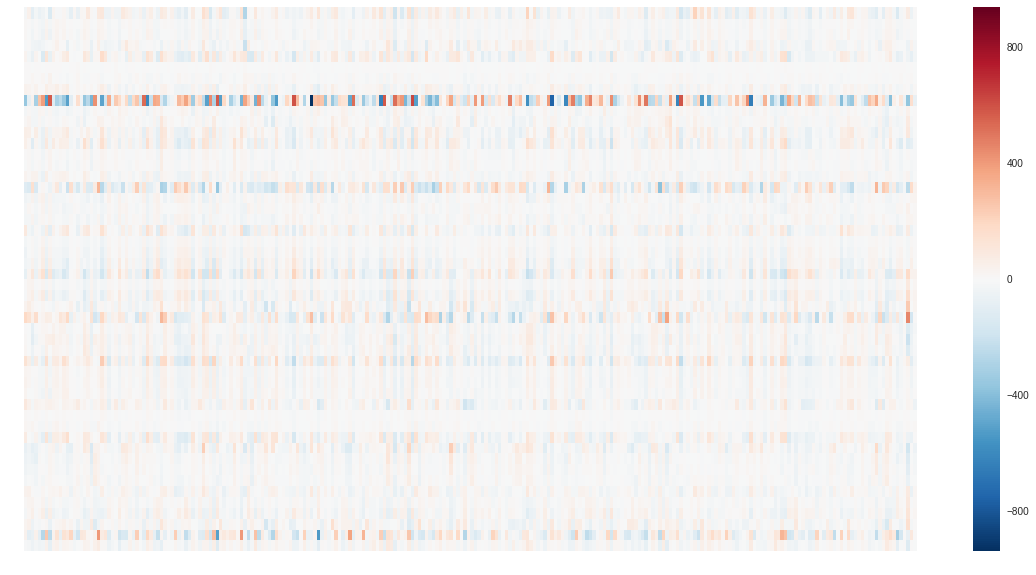

In [56]:
plt.figure(figsize=(20, 10))
plt.axis('off')
if lstm1_or_gru0:
    weights = model.L1_enc.lateral.W.grad 
else:
    weights = model.L1_enc.W.W.grad
if gpuid >= 0:
    weights = cuda.cupy.asnumpy(weights[:50,:])
# plt.imshow(weights, interpolation='none')
sns.heatmap(weights, cmap="RdBu_r")

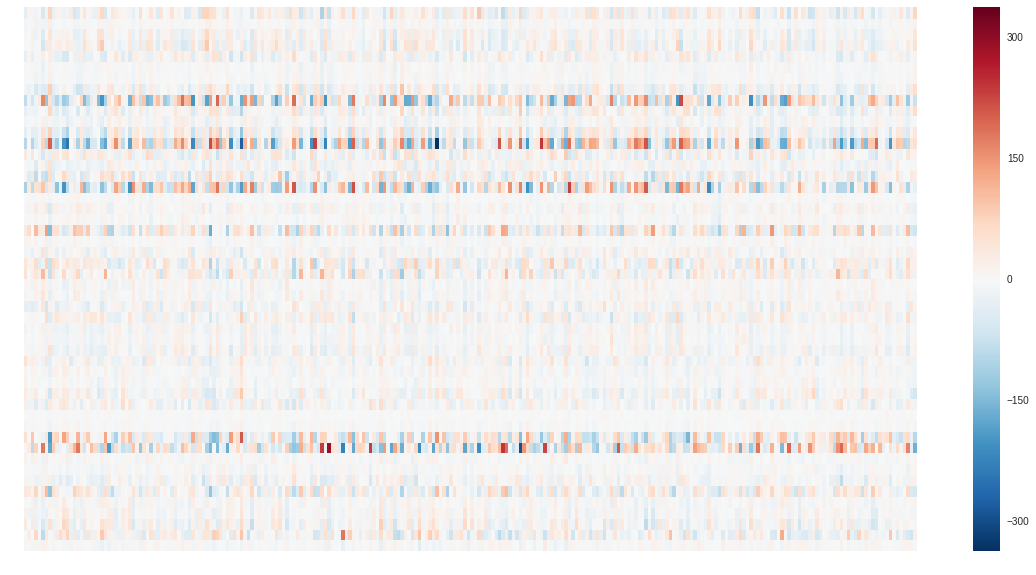

In [57]:
plt.figure(figsize=(20, 10))
plt.axis('off')
if lstm1_or_gru0:
    weights = model.L1_dec.lateral.W.grad 
else:
    weights = model.L1_dec.W.W.grad
if gpuid >= 0:
    weights = cuda.cupy.asnumpy(weights[:50,:])
# plt.imshow(weights, interpolation='none')
sns.heatmap(weights, cmap="RdBu_r")

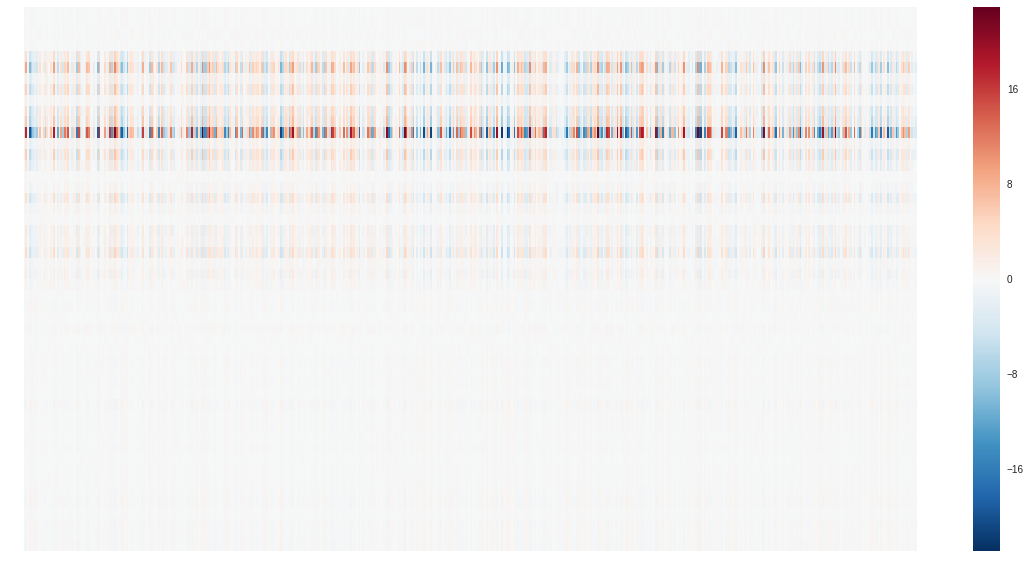

In [58]:
plt.figure(figsize=(20, 10))
plt.axis('off')
if lstm1_or_gru0:
    weights = model.out.W.grad
else:
    weights = model.out.W.grad
if gpuid >= 0:
    weights = cuda.cupy.asnumpy(weights[:50,:])
# plt.imshow(weights, interpolation='none')
sns.heatmap(weights, cmap="RdBu_r")

In [23]:
xp.nonzero(model.embed_dec.W.grad)

(array([  1,   1,   1, ..., 277, 277, 277]),
 array([ 0,  1,  2, ..., 60, 62, 63]))

In [24]:
x_key, y_key

('sp', 'en_c')

In [25]:
es_c_utt_lens = []
en_c_utt_lens = []
for b in b_dict['buckets']:
    print(len(b), end=', ')
    print(max([len(m_dict[u]['es_w']) for u in b]), end=', ')
    print(max([len(m_dict[u]['es_c']) for u in b]), end=', ')
    print(max([len(m_dict[u]['en_w']) for u in b]), end=', ')
    print(max([len(m_dict[u]['en_c']) for u in b]))
    es_c_utt_lens.extend([len(m_dict[u]['es_c']) for u in b])
    en_c_utt_lens.extend([len(m_dict[u]['en_c']) for u in b])
        

2743, 5, 15, 5, 20
23182, 20, 97, 19, 91
19424, 16, 73, 17, 79
14694, 16, 73, 20, 79
12075, 33, 161, 33, 173
9881, 23, 121, 28, 126
8092, 26, 120, 29, 131
6646, 33, 193, 35, 179
5557, 34, 164, 39, 178
4774, 44, 187, 45, 181
4244, 39, 177, 40, 192
3997, 38, 195, 44, 193
3759, 42, 211, 47, 229
3386, 43, 209, 49, 216
3171, 47, 230, 53, 229
2851, 47, 223, 56, 242
2344, 49, 229, 56, 273
1991, 58, 250, 56, 245
1585, 51, 258, 57, 274
4312, 73, 351, 69, 328


(array([  7.07470000e+04,   2.71000000e+04,   1.56890000e+04,
          1.31500000e+04,   8.90800000e+03,   2.51000000e+03,
          5.01000000e+02,   8.30000000e+01,   1.50000000e+01,
          5.00000000e+00]),
 array([   1.,   36.,   71.,  106.,  141.,  176.,  211.,  246.,  281.,
         316.,  351.]),
 <a list of 10 Patch objects>)

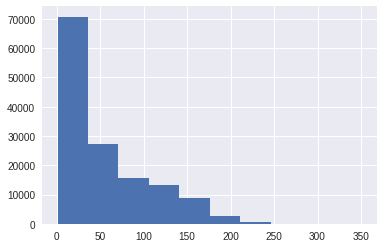

In [26]:
plt.hist(es_c_utt_lens, bins=10)

(array([  6.76360000e+04,   2.87350000e+04,   1.68420000e+04,
          1.30300000e+04,   8.58600000e+03,   3.01400000e+03,
          6.84000000e+02,   1.41000000e+02,   3.50000000e+01,
          5.00000000e+00]),
 array([   0. ,   32.8,   65.6,   98.4,  131.2,  164. ,  196.8,  229.6,
         262.4,  295.2,  328. ]),
 <a list of 10 Patch objects>)

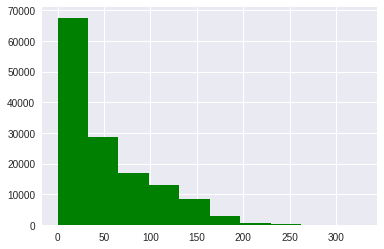

In [27]:
plt.hist(en_c_utt_lens, bins=10, color='g')

In [28]:
100 * 10 * 20 / 1000

20.0

### Set up encoder

In [ ]:
h = model.forward_deep_cnn(batch_data['X'])

In [ ]:
len(model.cnns)

In [ ]:
h.shape

In [ ]:
model.forward_rnn(h)

In [ ]:
model.forward_enc(batch_data['X'])
model.set_decoder_state()
y = F.swapaxes(batch_data['y'], 0, 1)
# with cmodel.forward_enc(batch_data['X'])
# with chainer.using_config('train', True):
#     myloss = model.decode_batch(y)

In [ ]:
model.enc_states.shape, 1280 /2/3//4

### Start decoding

In [ ]:
model.embed_units*2, model.n_units

In [ ]:
batch_size = y.shape[1]
ht = Variable(xp.zeros((batch_size, model.n_units), dtype=xp.float32))
print(ht.shape)
for curr_word, next_word in zip(y, y[1:]):
    embed_id = model.embed_dec(curr_word)
    print(embed_id.shape, curr_word.shape)
    rnn_in = F.concat((embed_id, ht), axis=1)
    print(rnn_in.shape)
    h = model.feed_rnn(rnn_in, model.rnn_dec)
    cv, _ = model.compute_context_vector(h)
    cv_hdec = F.concat((cv, h), axis=1)
    ht = model.context(cv_hdec)
    # batch normalization before non-linearity
    if USE_BN:
        ht = model.context_bn(ht)
    ht = F.tanh(ht)

    predicted_out = model.out(ht)
    print(predicted_out.shape)
    print(ht.shape)
    break

In [ ]:
ht = xp.zeros((y.shape[1],model.n_units), dtype=xp.float32)

In [ ]:
embed_id.shape

In [ ]:
F.concat((embed_id, ht), axis=1).shape

In [ ]:
model[model.rnn_enc[-1]].h.shape

In [ ]:
model.set_decoder_state(h)

In [ ]:
model.enc_states.shape, h.shape

### Understanding batch matmul and matmul

In [ ]:
weights = F.batch_matmul(model.enc_states, h)

In [ ]:
weights.shape, h.shape

In [ ]:
weights[0,:5]

In [ ]:
model.enc_states[0].shape, h[0].shape

In [ ]:
F.matmul(model.enc_states[0], h[0])[:5]

### Attention!

In [ ]:
ht = model.attn_Wa(h)

In [ ]:
ht.shape

In [ ]:
weights = F.batch_matmul(model.enc_states, ht)

In [ ]:
weights.shape

### Batch and Layer Normalization

In [ ]:
X = batch_data['X']
y = batch_data['y']

In [ ]:
X.shape, y.shape, X[0,:2].shape

In [ ]:
l1 = L.Linear(69,10)
l1.to_gpu()

In [ ]:
h1 = l1(X[0,:2])

In [ ]:
h1.shape

In [ ]:
h1

In [ ]:
bn1 = L.BatchNormalization(10)
bn1.to_gpu()

In [ ]:
ln1 = L.LayerNormalization(10)
ln1.to_gpu()

### Checking BN, LN on network

In [ ]:
h.shape

In [ ]:
# Layer normalization
xp.mean(h.data,axis=1), xp.var(h.data,axis=1)

In [ ]:
xp.mean(model.L1_dec_ln(h).data,axis=1).shape

In [ ]:
xp.mean(h.data,axis=0).shape

In [ ]:
X = batch_data['X']
h = F.swapaxes(X,1,2)

h = F.relu(model[model.cnns[0]](h))
h = F.max_pooling_nd(h, ksize=cnn_max_pool[0],
                                 stride=cnn_max_pool[0],
                                 pad=max_pool_pad)
# h = model.forward_deep_cnn(h)
# print(h.shape)
# h = F.rollaxis(h, 2)
h = F.swapaxes(h,1,2)
print(h.shape)

In [ ]:
huhu = L.BatchNormalization(256)
huhu.to_gpu()

In [ ]:
h[:,0,:].shape

In [ ]:
huhu(h[:,0,:]).shape

In [ ]:
model.CNN_0_bn(h)

In [ ]:
h.shape, model.CNN_2_bn.params

In [ ]:
xp.mean(h.data, axis=(0,1)), xp.var(h.data, axis=(0,1))

In [ ]:
# xp.mean(model.CNN_2_bn(h).data[0], axis=1)

In [ ]:
xp.mean(h[0].data,axis=0)

### mean and var across all inputs in the batch and the same dimension should be 0, and ~1 respectively

The shape should be the number of hidden units

In [ ]:
h2_bn = bn1(h1)

In [ ]:
h2_bn

In [ ]:
xp.mean(h1.data,axis=0), xp.var(h1.data,axis=0)

In [ ]:
xp.mean(h2_bn.data,axis=0), xp.var(h2_bn.data,axis=0)

In [ ]:
h2_ln = ln1(h1)

In [ ]:
h2_ln

### mean and var across all layer activations within a batch should be 0, and ~1 respectively

The shape should be the batch size

In [ ]:
xp.mean(h2_ln.data,axis=1), xp.var(h2_ln.data,axis=1)

### CNN across frequencies

In [ ]:
a = xp.random.randn(39)

In [ ]:
a

In [ ]:
b = F.expand_dims(a, axis=1)

In [ ]:
c = F.reshape(a, (-1,13))

In [ ]:
c.shape

In [ ]:
c.data[1,:5]

In [ ]:
a = xp.load("mfcc_out/fisher_dev/20051009_182032_217_fsp-A-100.npy")

In [ ]:
a.shape

In [ ]:
b = F.reshape(a, (1,len(a),-1,13))

In [ ]:
b.shape

In [ ]:
b = F.swapaxes(b,1,2)

In [ ]:
b.shape

In [ ]:
a[0,:20]

In [ ]:
b[0,0,:2,:5]

In [ ]:
c2d_1 = L.Convolution2D(in_channels=None, 
                      out_channels=32, 
                      ksize=(3,3), 
                      stride=(2,2),pad=3//2)

c2d_bn_1 = L.BatchNormalization(32)

c2d_2 = L.Convolution2D(in_channels=None, 
                      out_channels=32, 
                      ksize=(3,3), 
                      stride=(2,2),pad=3//2)

c2d_bn_2 = L.BatchNormalization(32)

c2d_1.to_gpu()
c2d_2.to_gpu()
c2d_bn_1.to_gpu()
c2d_bn_2.to_gpu()

In [ ]:
X = batch_data['X']
y = batch_data['y']
X.shape, y.shape

In [ ]:
h = F.reshape(X, (X.shape[:2] + tuple([-1,SPEECH_DIM // 3])))
h.shape

In [ ]:
h = F.swapaxes(h,1,2)
h.shape

In [ ]:
c = c2d_1(h)

In [ ]:
c2d_1.W.shape

In [ ]:
c.shape

In [ ]:
c_bn = c2d_bn_1(c)

In [ ]:
c_bn.shape

In [ ]:
d = c2d_2(c)

In [ ]:
c2d_2.W.shape

In [ ]:
d.shape

In [ ]:
d_bn = c2d_bn_1(d)

In [ ]:
d_bn.shape

In [ ]:
e = F.swapaxes(d, 1,2)

In [ ]:
e.shape

In [ ]:
e.shape[:2] + tuple([-1])

In [ ]:
e = F.reshape(e, e.shape[:2] + tuple([-1]))

In [ ]:
e.shape

In [ ]:
cnd_1 = L.ConvolutionND(ndim=3,
                        in_channels=1, 
                        out_channels=32, 
                        ksize=(3,3,3), 
                        stride=2,pad=3//2)

cnd_2 = L.ConvolutionND(ndim=3,
                        in_channels=1, 
                        out_channels=32, 
                        ksize=(3,3,3), 
                        stride=2,pad=3//2)

cnd_1.to_gpu()
cnd_2.to_gpu()

### NStepBiGRU

In [ ]:
ng_enc = L.NStepGRU(2,SPEECH_DIM, hidden_units, DROPOUT_RATIO)
ng_dec = L.NStepGRU(2,hidden_units, hidden_units, DROPOUT_RATIO)
ng_enc.to_gpu()
ng_dec.to_gpu()

In [ ]:
X, y = batch_data['X'][:,:20,:], batch_data['y']

In [ ]:
X.shape, y.shape

In [ ]:
X_list = list(X)

In [ ]:
h,o = ng_enc(hx=None, xs=X_list)

In [ ]:
X_list[0].shape

In [ ]:
h.shape, len(o)

In [ ]:
h[:1].shape,h[-1,:,:].shape

In [ ]:
o[1]

In [ ]:
Variable(o)

In [ ]:
o = Variable(np.asarray(o))
o.shape

In [ ]:
hd,od = ng_dec(hx=h,xs=o)

In [ ]:
hd.shape

### Make predictions

In [ ]:
pred_sents, loss = feed_model(map_dict[key],
                              b_dict=bucket_dict[key],
                              vocab_dict=vocab_dict,
                              batch_size=64,
                              x_key=enc_key,
                              y_key=dec_key,
                              train=True,
                              cat_speech_path=os.path.join(out_path, key))

In [ ]:
[(w.decode(),f) for w,f in vocab_dict['es_c']['freq'].items()]

In [ ]:
"".join([w.decode() for w in map_dict['fisher_train']['20050908_182943_22_fsp-B-7']['es_c']])

In [ ]:
xp = cuda.cupy if gpuid >= 0 else np

In [ ]:
print(len(vocab_dict[enc_key]['w2i']))
print(len(vocab_dict[dec_key]['w2i']))

In [ ]:
if gpuid >= 0:
    # print("here")
    cuda.get_device_from_id(gpuid).use()

In [ ]:
model = SpeechEncoderDecoder()

if gpuid >= 0:
    cuda.get_device(gpuid).use()
    model.to_gpu()

In [ ]:
if OPTIMIZER_ADAM1_SGD_0:
    print("using ADAM optimizer")
    # optimizer = optimizers.Adam(alpha=0.001,
    #                             beta1=0.9,
    #                             beta2=0.999,
    #                             eps=1e-08)
    # optimizer = optimizers.AdaGrad()
    optimizer = optimizers.Adam()
    optimizer.setup(model)
else:
    print("using SGD optimizer")
    optimizer = optimizers.SGD(lr=0.01)
    optimizer.setup(model)

if WEIGHT_DECAY:
    optimizer.add_hook(chainer.optimizer.WeightDecay(WD_RATIO))

# gradient clipping
optimizer.add_hook(chainer.optimizer.GradientClipping(threshold=2))

In [ ]:
print(type(map_dict['fisher_train']['20050908_182943_22_fsp-B-7']['en_w']))
print(type(map_dict['fisher_dev']['20051009_182032_217_fsp-B-1']['en_w'][0]))

In [ ]:
map_dict['fisher_dev']['20051009_182032_217_fsp-B-1']['en_w'][0]

In [ ]:
feed_model(map_dict['fisher_train'], b_dict=bucket_dict['fisher_train'], 
           vocab_dict=vocab_dict, batch_size=BATCH_SIZE, 
           x_key=enc_key, y_key=dec_key, cat_speech_path=out_path)

In [ ]:
vocab_dict = pickle.load(open("out/train_vocab.dict", "rb"))
vocab_dict['es_w']['w2i'][b'solas']

In [ ]:
map_dict['fisher_train']['20050908_182943_22_fsp-B-7']['es_w']

In [ ]:
len(pred_sents), pred_sents[0]

In [ ]:
for b in b_shuffled:
    bucket = bucket_dict['fisher_train']['buckets'][b]
    b_len = len(bucket)
    print(b_len)
    for i in range(0,b_len, 32):
        

## Noise simulation test

In [ ]:
list(map_dict['fisher_train'].keys())[:5]

In [ ]:
test_batch = buckets_dict['train'][0]['X_fwd'][:10]

In [ ]:
test_batch.shape

In [ ]:
noise_var = np.full(test_batch.shape, 0.01, dtype=np.float32)

In [ ]:
noise = Variable(np.random.normal(0.0, .01, size=test_batch.shape).astype(xp.float32))
noise.to_gpu()

In [ ]:
test_batch_noise = test_batch + noise

In [ ]:
test_batch[0,0,:5], test_batch_noise[0,0,:5]

## Checking for consistency in train/dev sets

In [ ]:
print(set([f.split(".")[0] for f in text_data['train'].keys()]), sep=", ")

In [ ]:
print(set([f.split(".")[0] for f in text_data['dev'].keys()]), sep=", ")

In [ ]:
train_fids = []
for b in buckets_dict["train"]:
    train_fids.extend(b['f'])
dev_fids = []
for b in buckets_dict["dev"]:
    dev_fids.extend(b['f'])
print(len(train_fids), len(dev_fids))
print(set([f.split(".")[0] for f in train_fids]), sep=", ")
print(set([f.split(".")[0] for f in dev_fids]), sep=", ")

In [ ]:
text_data['train'].keys()

## Predictions

In [ ]:
pr_ids, en_ids = predict(4,2, cat="dev", display=True)

In [ ]:
model_fil

In [ ]:
model_fil_old = 'small/seq2seq_sen-4000_hwy4-dec2_emb-512-h-512__word_gru_sspkr_drpt-0_noise-0.20_l2-0.001_cnn-num100-range9-199-20-pool900_10.model'

In [ ]:
!ls $model_fil_old

In [ ]:
serializers.load_npz(model_fil_old, model)

In [ ]:
pplx_new = compute_pplx(cat="dev", num_sent=100)

In [ ]:
pr_ids, en_ids = predict(3,2, cat="train", display=True)

In [ ]:
pr_ids, en_ids = predict(3,2, cat="dev", display=True)